<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Maverik-Capstone-Modeling" data-toc-modified-id="Maverik-Capstone-Modeling-1">Maverik Capstone Modeling</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span><ul class="toc-item"><li><span><a href="#Project-Goal" data-toc-modified-id="Project-Goal-2.1">Project Goal</a></span></li><li><span><a href="#Business-Problem-Statement" data-toc-modified-id="Business-Problem-Statement-2.2">Business Problem Statement</a></span></li><li><span><a href="#Analytic-Problem" data-toc-modified-id="Analytic-Problem-2.3">Analytic Problem</a></span></li><li><span><a href="#Modeling-Notebook-Tasks" data-toc-modified-id="Modeling-Notebook-Tasks-2.4">Modeling Notebook Tasks</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3">EDA</a></span><ul class="toc-item"><li><span><a href="#Loading-and-viewing-the-data" data-toc-modified-id="Loading-and-viewing-the-data-3.1">Loading and viewing the data</a></span></li><li><span><a href="#Evaluating-missing-data" data-toc-modified-id="Evaluating-missing-data-3.2">Evaluating missing data</a></span></li><li><span><a href="#Imputing-the-data" data-toc-modified-id="Imputing-the-data-3.3">Imputing the data</a></span></li><li><span><a href="#Removing-uncessary-columns" data-toc-modified-id="Removing-uncessary-columns-3.4">Removing uncessary columns</a></span></li><li><span><a href="#Summary-of-the-data" data-toc-modified-id="Summary-of-the-data-3.5">Summary of the data</a></span></li><li><span><a href="#Merging-the-datasets" data-toc-modified-id="Merging-the-datasets-3.6">Merging the datasets</a></span></li><li><span><a href="#Date-transformation" data-toc-modified-id="Date-transformation-3.7">Date transformation</a></span></li><li><span><a href="#User-defined-date-functions" data-toc-modified-id="User-defined-date-functions-3.8">User defined date functions</a></span></li><li><span><a href="#Correlation-heat-map" data-toc-modified-id="Correlation-heat-map-3.9">Correlation heat map</a></span></li><li><span><a href="#Create-Dummy-Variables" data-toc-modified-id="Create-Dummy-Variables-3.10">Create Dummy Variables</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4">Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-model" data-toc-modified-id="Linear-model-4.1">Linear model</a></span><ul class="toc-item"><li><span><a href="#Predict-on-the-training-set" data-toc-modified-id="Predict-on-the-training-set-4.1.1">Predict on the training set</a></span></li><li><span><a href="#Predict-on-the-test-set" data-toc-modified-id="Predict-on-the-test-set-4.1.2">Predict on the test set</a></span></li></ul></li><li><span><a href="#Prophet-Model" data-toc-modified-id="Prophet-Model-4.2">Prophet Model</a></span><ul class="toc-item"><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-4.2.1">Training the model</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-4.2.2">Cross validation</a></span></li><li><span><a href="#Testing-the-model" data-toc-modified-id="Testing-the-model-4.2.3">Testing the model</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-5">Results</a></span></li></ul></div>

# Maverik Capstone Modeling
Rachel Butterfield 
Created: 10/21/23

# Introduction

## Project Goal

Maverik will be able to implement the model created in order to predict daily sales for diesel fuel, unleaded fuel, merchandise, and food sales for the entire first year of a store's operation. This model needs to surpass the accuracy metrics used by the current Maverik model in predicting these 4 product sales. 

## Business Problem Statement

Maverik, a convenience store and gas station chain with 300+ locations in the Western United States, aims to enhance its ability to assess the return on investment (ROI) for new stores, which are opened at an average rate of 30 per year. To achieve this, they require a new model capable of generating daily sales projections for merchandise, food sales, and total gallons sold for diesel and unleaded fuel for the entire first year of a store's operation. 

This data-driven approach will enable Maverik to closely monitor the performance of new stores, make informed decisions, and promptly address any under performing outlets. Maverik desires to know the daily sales for each of the 4 main products diesel fuel, unleaded fuel, merchandise, and food sales. Having these daily predictions allows for better planning for seasonality and setting realistic goals and expectations for what each new store can bring in revenue for the year.

## Analytic Problem

The target variables is specifically daily sales for the diesel, unleaded fuel, merchandise, and food services. Represented in the time_series_data_msba.csv sets of time series sales data where the variables

* daily_yoy_ndt.total_inside_sales:	Inside sales, everything that isn't made at the store
* daily_yoy_ndt.total_food_service:	Food service sales, everything that is made at the store
* diesel:	Diesel gallons sold
* unleaded:	all non-diesel gallons

The main level of accuracy that we will use to determine the performance of this model is RMSE and R Squared.

* Predict the daily sales for each 4 products diesel, unleaded fuel, merchandise, and food service for each store for the following year based on the time series data.

* Use a Prophet method to see the daily sales predictions for each of the 4 product categories for a new store.

The success of this project will be measured by its capacity to accurately predict sales metrics and its usability for future stores. Our team will be judging our model based on RSME results. Since our target variables are numeric, we will explore which data features are significant via a linear regression model and then apply those features to a variety of data modeling techniques including a time series model. 

## Modeling Notebook Tasks

* Identify a performance benchmark. 
* Identify appropriate models to explore (given the business problem and the project objective).
* Do additional data preparation and feature engineering as necessary. 
* Perform cross-validation to develop performance metrics for each model, appropriate for the context. 
* Optimize model performance with hyperparameter tuning, if appropriate.
* Evaluate the strengths and weaknesses of each model and select the best one. 
* Perform business validation of the model.  

# EDA

## Loading and viewing the data

In [1]:
#loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time
import statsmodels.api as sm
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#making dataframes for each of the csv files
qual = pd.read_csv("qualitative_data_msba.csv")
time = pd.read_csv("time_series_data_msba.csv")

In [3]:

#shape of the qualitative (qual) and time series datafames (time)
#qual DF
print(qual.shape)

#time DF
print(time.shape)

(37, 55)
(13908, 12)


The raw data for the qual DF is relatively small with 37 rows of data and 55 different variables. The time DF has a lot more observations with 12 different variables.

In [4]:
#qual DF data types
qual.dtypes

Unnamed: 0                                  int64
open_year                                   int64
square_feet                                 int64
front_door_count                            int64
years_since_last_project                    int64
parking_spaces                              int64
lottery                                    object
freal                                      object
bonfire_grill                              object
pizza                                      object
cinnabon                                   object
godfather_s_pizza                          object
ethanol_free                               object
diesel                                     object
hi_flow_lanes                              object
rv_lanes                                   object
hi_flow_rv_lanes                           object
def                                        object
cat_scales                                 object
car_wash                                   object


In [5]:
#time DF data types
time.dtypes

index                                   int64
capital_projects.soft_opening_date     object
calendar.calendar_day_date             object
calendar.fiscal_week_id_for_year        int64
calendar.day_of_week                   object
calendar_information.holiday           object
calendar_information.type_of_day       object
daily_yoy_ndt.total_inside_sales      float64
daily_yoy_ndt.total_food_service      float64
diesel                                float64
unleaded                              float64
site_id_msba                            int64
dtype: object

## Evaluating missing data

In [6]:
#check for null and provide a count of the total
missing_qual = (qual.isnull().sum())

#filter for any columns that have greater than 0 null values
missing_qual = missing_qual[missing_qual > 0]

#sort the columns in descending order based on count
missing_qual = missing_qual.sort_values(ascending=False)

#provide a percentage of missing values in each column 
percent_missing_qual = (missing_qual / len(qual)) * 100
percent_missing_qual = percent_missing_qual.round(2)

#create a DF that includes the missing count and percentages
missing_data_qual = pd.DataFrame({'Missing Count': missing_qual, 'Percentage': percent_missing_qual})

#display all the columns based on the above criteria
with pd.option_context('display.max_rows', None):
    print(missing_data_qual)

                             Missing Count  Percentage
hi_flow_lanes_layout                    15       40.54
hi_flow_lanes_stack_type                15       40.54
rv_lanes_layout                         14       37.84
rv_lanes_stack_type                     14       37.84
hi_flow_rv_lanes_layout                 14       37.84
hi_flow_rv_lanes_stack_type             14       37.84


## Imputing the data

After consulting with Maverik, the N/A values in these qual DF columns are not missing data. They are features that don't exist at these store locations and should be changed to 'none'. 

#fill all missing values in the qual DF with 'none'
qual.fillna('none', inplace=True)

#check for null values again
missing_qual = (qual.isnull().sum())
print(missing_qual)

There are now no null values in the qual DF. 

In [7]:
#check for null and provide a count of the total for time DF
time1 = (time.isnull().sum())
print(time1)

index                                 0
capital_projects.soft_opening_date    0
calendar.calendar_day_date            0
calendar.fiscal_week_id_for_year      0
calendar.day_of_week                  0
calendar_information.holiday          0
calendar_information.type_of_day      0
daily_yoy_ndt.total_inside_sales      0
daily_yoy_ndt.total_food_service      0
diesel                                0
unleaded                              0
site_id_msba                          0
dtype: int64


## Removing uncessary columns

In [8]:
#constant values in all columns
constant_columns = [col for col in qual.columns if qual[col].nunique() == 1]
print("Columns with no variance (constant values):", constant_columns)

Columns with no variance (constant values): ['front_door_count', 'godfather_s_pizza', 'diesel', 'car_wash', 'ev_charging', 'hi_flow_lanes_stack_type', 'non_24_hour', 'self_check_out']


The above columns contain the exact same information on every row. I'm removing them from the DF because they do not add any valuable information to the model. 

In [9]:
#remove the constant columns from the qual DF
qual.drop(columns=constant_columns, inplace=True)

#qual DF new shape
print(qual.shape)

(37, 47)


## Summary of the data

In [10]:
#qual DF summary stats
qual.describe()

,Unnamed: 0,open_year,square_feet,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,...,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
count,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.000000,2021.324324,4970.27027,1.648649,37.405405,6703.567568,4757.648649,53300.378378,1833.108108,1514.135135,...,14.270270,2.513514,3.324324,3.324324,2.513514,2.378378,2.351351,4.648649,1.702703,23040.405405
std,10.824355,0.474579,575.93121,0.483978,5.918237,5694.011350,4697.168291,24333.027254,1915.140476,2489.423094,...,3.948619,2.049683,2.925501,2.925501,2.049683,0.923500,0.856875,1.751447,0.740303,730.069801
min,1.000000,2021.000000,2933.00000,1.000000,23.000000,0.000000,56.000000,0.000000,0.000000,31.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21560.000000
25%,10.000000,2021.000000,5046.00000,1.000000,34.000000,1984.000000,1771.000000,39538.000000,262.000000,386.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,22540.000000
50%,19.000000,2021.000000,5046.00000,2.000000,38.000000,5574.000000,3895.000000,46356.000000,1003.000000,1037.000000,...,12.000000,4.000000,5.000000,5.000000,4.000000,2.000000,2.000000,4.000000,2.000000,22890.000000
75%,28.000000,2022.000000,5046.00000,2.000000,41.000000,11269.000000,6002.000000,73519.000000,2686.000000,1616.000000,...,16.000000,4.000000,5.000000,5.000000,4.000000,3.000000,3.000000,6.000000,2.000000,23555.000000
max,37.000000,2022.000000,6134.00000,2.000000,49.000000,18692.000000,26077.000000,110957.000000,5923.000000,15403.000000,...,24.000000,6.000000,9.000000,9.000000,6.000000,5.000000,5.000000,10.000000,4.000000,24535.000000


In [11]:
#time DF summary stats
time.describe()

,index,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
count,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000
mean,6954.500000,26.501079,2846.537988,759.922326,1702.585227,2382.091588,23041.052632
std,4015.038107,14.998715,981.299870,341.578220,2161.208192,1025.518658,710.634218
min,1.000000,1.000000,0.000000,0.000000,0.000000,240.180500,21560.000000
25%,3477.750000,14.000000,2181.156250,521.087875,383.062750,1654.149000,22540.000000
50%,6954.500000,26.000000,2693.976250,697.434500,1018.920000,2256.677500,22907.500000
75%,10431.250000,39.000000,3325.306250,924.282625,2283.297625,2928.254000,23555.000000
max,13908.000000,52.000000,7172.466000,2531.662000,20853.952000,8077.233500,24535.000000


In [12]:
#qual head
qual.head()

,Unnamed: 0,open_year,square_feet,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,...,hi_flow_lanes_layout,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,1,2021,5046,2,38,Yes,Yes,Yes,No,No,...,Stack,4,6,Stack,HF/RV,2,2,6,2,21560
1,2,2021,5046,2,39,No,Yes,Yes,Yes,No,...,Combo,9,4,Combo,HF/RV,5,5,10,4,21980
2,3,2021,5046,2,35,Yes,Yes,Yes,Yes,No,...,NaN,0,5,In-Line,None,3,2,4,1,22015
3,4,2021,5046,2,36,No,Yes,Yes,Yes,No,...,Combo,5,4,Combo,HF/RV,3,3,6,2,22085
4,5,2021,5046,2,25,Yes,Yes,Yes,No,No,...,NaN,0,0,NaN,NaN,0,0,0,0,22120


In [13]:
#time head
time.head()

,index,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,1,6/14/2022,6/17/2022,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,2,6/14/2022,6/22/2022,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,3,6/14/2022,6/23/2022,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,4,6/14/2022,6/26/2022,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,5,6/14/2022,6/27/2022,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535


## Merging the datasets
The data sets do not have the same number of observations. The qualitative data is missing information for site_ID_MSBA 23065. We will remove this observation from the data when we join that data sets.

In [14]:
#merging datasets and droppoing uneeded site id
data = pd.merge(qual, time, on = 'site_id_msba', how = 'inner')
data = data.drop('Unnamed: 0', axis = 1) # drop unneeded column
data.head()

,open_year,square_feet,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,ethanol_free,...,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded
0,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,1/12/2021,1/17/2021,3,Sunday,NONE,WEEKEND,1792.1260,528.8185,870.0160,1490.3980
1,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,1/12/2021,1/20/2021,3,Wednesday,NONE,WEEKDAY,2297.4595,793.7300,1582.0420,1750.7525
2,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,1/12/2021,1/21/2021,3,Thursday,NONE,WEEKDAY,2381.5120,829.0730,1506.6660,1727.6210
3,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,1/12/2021,1/24/2021,4,Sunday,NONE,WEEKEND,1396.4370,456.1830,510.9370,1184.8060
4,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,1/12/2021,1/29/2021,5,Friday,NONE,WEEKDAY,2568.2370,782.6245,1604.0325,1987.2720


## Date transformation
How to identify a yearly week and yearly week day from a date value?
How to identify a US Holiday from a date value?

In [15]:
from datetime import date
import holidays

def get_holiday(date):
  US_holidays = holidays.US()

In [16]:
#How many holidays are being flagged in the data from Maverick?

print(data['calendar_information.holiday'].unique().size)
data['calendar_information.holiday'].unique()

26


array(['NONE', "Lincoln's Birthday", "Washington's Birthday", 'Easter',
       'Memorial Day', "Father's Day", "Veteran's Day",
       "Saint Valentine's Day", "Mother's Day", 'Independence Day',
       'Christmas Day', "New Year's Eve", 'Martin Luther King Day',
       "President's Day", "Saint Patrick's Day", 'Labor Day',
       'Columbus Day', 'Thanksgiving Day', 'Christmas Eve', 'Palm Sunday',
       'Good Friday', 'Ascension', 'Flag Day', 'Halloween Day',
       "All Saint's Day", "New Year's Day"], dtype=object)

Holidays
There are 26 holidays being flagged by Maverick. Some of these seem to be Catholic holidays. For example, 'Good Friday' and 'Palm Sunday'. These seem odd to be tracking as they are not federal holidays where people are off work or traveling.

For simplicity, we are instead only going to track federal holidays. We will use the holidays.US package to identify holidays moving forward. To do this we will drop the current holidays data and add a new holidays variable using the previously mentioned package.

In [17]:
#drop calendar info column
data = data.drop('calendar_information.holiday', axis = 1)

In [18]:
#only using US federal holidays
data['Holidays'] = pd.Series(data['calendar.calendar_day_date']).apply(lambda x: holidays.US().get(x)).values
data.Holidays.unique()

array([None, 'Memorial Day', 'Juneteenth National Independence Day',
       'Veterans Day', 'Juneteenth National Independence Day (Observed)',
       'Independence Day', 'Christmas Day', "New Year's Day (Observed)",
       'Martin Luther King Jr. Day', "Washington's Birthday",
       'Independence Day (Observed)', 'Labor Day', 'Columbus Day',
       'Thanksgiving', 'Christmas Day (Observed)', "New Year's Day"],
      dtype=object)

In [19]:
#check for null values in holiday
data.isnull().sum()

open_year                                      0
square_feet                                    0
years_since_last_project                       0
parking_spaces                                 0
lottery                                        0
freal                                          0
bonfire_grill                                  0
pizza                                          0
cinnabon                                       0
ethanol_free                                   0
hi_flow_lanes                                  0
rv_lanes                                       0
hi_flow_rv_lanes                               0
def                                            0
cat_scales                                     0
rv_dumps                                       0
propane                                        0
x1_mile_pop                                    0
x1_mile_emp                                    0
x1_mile_income                                 0
x1_2_mile_pop       

In [20]:
#fill null values for joined data
data.fillna('Not Holiday', inplace = True)
data.fillna('None', inplace = True)

In [21]:
#double check null values in holiday
data.isnull().sum()

open_year                                  0
square_feet                                0
years_since_last_project                   0
parking_spaces                             0
lottery                                    0
freal                                      0
bonfire_grill                              0
pizza                                      0
cinnabon                                   0
ethanol_free                               0
hi_flow_lanes                              0
rv_lanes                                   0
hi_flow_rv_lanes                           0
def                                        0
cat_scales                                 0
rv_dumps                                   0
propane                                    0
x1_mile_pop                                0
x1_mile_emp                                0
x1_mile_income                             0
x1_2_mile_pop                              0
x1_2_mile_emp                              0
x1_2_mile_

## User defined date functions

These next few user-defined functions will be used both in the cleaning process and building out our predictions.

In [22]:
def get_holidays(date_value):
  return date_value in holidays.US()

In [23]:
def get_day_of_week(date_value):
  d = datetime.strptime(date_value, '%m/%d/%Y').weekday()
  return calendar.day_name[d]

In [24]:
def get_type_of_day(date_value):
  d = datetime.strptime(date_value, '%m/%d/%Y').weekday()
  if d < 5:
    return 'WEEKDAY'
  else:
    return 'WEEKEND'

In [25]:
def get_week_num(date_value):
  d = datetime.strptime(date_value, '%m/%d/%Y').strftime('%V')
  return d

## Correlation heat map

We wanted to see the correlation between variables to see if there are any particular variables that correlate with each other. From looking through the plot, we did not find correlation to be out of the ordinary.

In [26]:
data.corr().style.background_gradient(cmap ='coolwarm')

,open_year,square_feet,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,x1_2_mile_income,x5_min_pop,x5_min_emp,x5_min_inc,x7_min_pop,x7_min_emp,x7_min_inc,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba,index,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded
open_year,1.000000,-0.192409,-0.941357,-0.028334,-0.230505,-0.235286,0.170861,-0.220853,-0.161754,0.072294,-0.109812,-0.180327,0.146184,-0.094008,-0.141329,0.243834,0.159450,-0.061743,0.002163,0.002163,-0.061743,-0.224399,-0.219693,-0.326963,0.123938,0.671855,-0.667462,-0.000880,-0.069297,0.026521,-0.045712,-0.221243
square_feet,-0.192409,1.000000,0.181125,0.512273,0.081303,0.067731,0.124278,0.038785,0.065212,0.013999,0.031238,0.013214,0.118845,0.044482,-0.043739,-0.047139,0.101104,0.160360,0.079428,0.079428,0.160360,0.238842,0.253151,-0.036418,-0.252981,-0.203161,0.176818,0.000121,-0.196982,-0.108011,0.075498,-0.069720
years_since_last_project,-0.941357,0.181125,1.000000,0.022017,0.261263,0.257998,-0.109185,0.247346,0.162166,-0.029414,0.100381,0.164958,-0.096915,0.106509,0.151441,-0.181812,-0.239638,0.018920,-0.034996,-0.034996,0.018920,0.181408,0.171980,0.276330,-0.144581,-0.608462,0.596127,0.000534,0.088361,-0.018858,0.050270,0.201761
parking_spaces,-0.028334,0.512273,0.022017,1.000000,0.018800,0.149524,0.163143,0.043946,0.240364,0.004789,-0.016454,-0.038980,0.132765,-0.053546,-0.057206,0.026533,-0.038102,0.133496,0.078831,0.078831,0.133496,0.281180,0.338129,0.008764,0.167756,0.059525,-0.040036,0.000298,-0.227230,-0.152398,0.144365,-0.073563
x1_mile_pop,-0.230505,0.081303,0.261263,0.018800,1.000000,0.535985,0.249023,0.914542,0.339833,0.275087,0.821745,0.448041,0.398488,0.714997,0.320397,0.324207,-0.180283,-0.622701,-0.627867,-0.627867,-0.622701,-0.325018,-0.291902,-0.251707,-0.584866,-0.106862,0.100042,-0.000018,-0.146207,-0.364787,-0.412535,-0.128380
x1_mile_emp,-0.235286,0.067731,0.257998,0.149524,0.535985,1.000000,-0.246582,0.469044,0.887929,-0.179146,0.380305,0.748979,-0.155504,0.378551,0.636270,-0.189042,-0.166185,-0.190178,-0.142028,-0.142028,-0.190178,-0.028772,-0.035912,-0.043336,-0.153413,-0.217948,0.209303,-0.000348,-0.092304,-0.194294,-0.059426,-0.057403
x1_mile_income,0.170861,0.124278,-0.109185,0.163143,0.249023,-0.246582,1.000000,0.219782,-0.188947,0.885602,0.430553,-0.067320,0.916598,0.403490,-0.076149,0.772807,-0.039964,-0.182524,-0.255587,-0.255587,-0.182524,-0.297923,-0.141283,-0.258020,-0.322191,0.278455,-0.255273,0.000254,-0.138241,-0.224750,-0.182090,-0.013171
x1_2_mile_pop,-0.220853,0.038785,0.247346,0.043946,0.914542,0.469044,0.219782,1.000000,0.297205,0.243947,0.700259,0.398711,0.317704,0.600899,0.305795,0.266174,-0.170069,-0.581501,-0.548081,-0.548081,-0.581501,-0.359655,-0.252016,-0.275491,-0.537279,-0.094199,0.102584,0.000509,-0.121629,-0.306799,-0.357292,-0.116141
x1_2_mile_emp,-0.161754,0.065212,0.162166,0.240364,0.339833,0.887929,-0.188947,0.297205,1.000000,-0.172321,0.200069,0.531181,-0.168016,0.160154,0.378672,-0.258327,-0.184296,0.010716,0.053525,0.053525,0.010716,0.059919,0.087382,0.018092,-0.010498,-0.097665,0.094914,-0.000215,-0.035234,-0.092283,0.107757,-0.000437
x1_2_mile_income,0.072294,0.013999,-0.029414,0.004789,0.275087,-0.179146,0.885602,0.243947,-0.172321,1.000000,0.436332,0.055766,0.778329,0.406171,0.047975,0.682272,-0.047739,-0.151180,-0.274691,-0.274691,-0.151180,-0.374747,-0.243045,-0.244836,-0.431842,0.131216,-0.114872,-0.000192,-0.141035,-0.231706,-0.321937,-0.015916


## Create Dummy Variables

Now we need to convert categorical variables to numeric values for future analysis.

In [27]:
#create dummy variables
df_cat = data.select_dtypes(include = 'object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   lottery                             13542 non-null  object
 1   freal                               13542 non-null  object
 2   bonfire_grill                       13542 non-null  object
 3   pizza                               13542 non-null  object
 4   cinnabon                            13542 non-null  object
 5   ethanol_free                        13542 non-null  object
 6   hi_flow_lanes                       13542 non-null  object
 7   rv_lanes                            13542 non-null  object
 8   hi_flow_rv_lanes                    13542 non-null  object
 9   def                                 13542 non-null  object
 10  cat_scales                          13542 non-null  object
 11  rv_dumps                            13542 non-null  ob

In [28]:
col_ignore = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date']

df_ignore = data[col_ignore]
data = data.drop(col_ignore, axis = 1)
data = pd.get_dummies(data, drop_first = True, dtype = float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 81 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   open_year                                                 13542 non-null  int64  
 1   square_feet                                               13542 non-null  int64  
 2   years_since_last_project                                  13542 non-null  int64  
 3   parking_spaces                                            13542 non-null  int64  
 4   x1_mile_pop                                               13542 non-null  int64  
 5   x1_mile_emp                                               13542 non-null  int64  
 6   x1_mile_income                                            13542 non-null  int64  
 7   x1_2_mile_pop                                             13542 non-null  int64  
 8   x1_2_mile_emp   

In [29]:
data.head()

,open_year,square_feet,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,x1_2_mile_income,...,Holidays_Juneteenth National Independence Day (Observed),Holidays_Labor Day,Holidays_Martin Luther King Jr. Day,Holidays_Memorial Day,Holidays_New Year's Day,Holidays_New Year's Day (Observed),Holidays_Not Holiday,Holidays_Thanksgiving,Holidays_Veterans Day,Holidays_Washington's Birthday
0,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Modeling

## Linear model
The first model I'm going to build a simple linear model to view the relationship between the target variable (daily_yoy_ndt.total_inside_sales) and other variables in the dataset.

In [30]:
#remove the target variable from the dataset 
y_target = data.pop('daily_yoy_ndt.total_inside_sales')

In [31]:
#split the training and test set
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    y_target, 
                                                    test_size=.3, 
                                                    random_state=42)

### Predict on the training set

In [32]:
#Linear model on training set

#add a constant to the model
X_train_sm = sm.add_constant(X_train)

#fit the model
model = sm.OLS(y_train, X_train_sm).fit()

#model info
coefficients = round(model.params, 2)
std_errors = round(model.bse, 2)
p_values = round(model.pvalues, 4)

#feature names 
feature_names = ['Intercept'] + list(X_train.columns)

#create the model df
results_df = pd.DataFrame({
    #'Feature': feature_names,
    'Coefficient': coefficients,
    'Standard Error': std_errors,
    'Pr(>|t|)': p_values  # Change the name of the column here
})

#display the df
pd.set_option('display.max_rows', None)
print(results_df)

#display r2 and r2 adjusted
print(f"R2: {round(model.rsquared, 4)}")
print(f"Adjusted R2: {round(model.rsquared_adj, 4)}")

                                                    Coefficient  \
const                                                     -0.13   
open_year                                                -19.66   
square_feet                                               -0.65   
years_since_last_project                                 561.88   
parking_spaces                                            13.37   
x1_mile_pop                                                0.07   
x1_mile_emp                                                0.02   
x1_mile_income                                             0.04   
x1_2_mile_pop                                              0.00   
x1_2_mile_emp                                              0.12   
x1_2_mile_income                                          -0.01   
x5_min_pop                                                -0.06   
x5_min_emp                                                -0.10   
x5_min_inc                                                -0.0

### Predict on the test set

In [33]:
#add constant to the model
X_train_sm = sm.add_constant(X_train)

#fit the model
model = sm.OLS(y_train, X_train_sm).fit()

#model info
coefficients = round(model.params, 2)
std_errors = round(model.bse, 2)
p_values = round(model.pvalues, 4)

#feature names
feature_names = ['Intercept'] + list(X_train.columns)

#create a df
results_df = pd.DataFrame({
    #'Feature': feature_names,
    'Coefficient': coefficients,
    'Standard Error': std_errors,
    'Pr(>|t|)': p_values
})

#display the df
print(results_df)

#predict on the test set
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

#r2 for test set
r2_test = r2_score(y_test, y_pred)

#r2 adjusted for test set
n = len(X_test)
k = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - k - 1)

#diplay r2 and r2 adjusted values
print(f"R2 for test set: {round(r2_test, 4)}")
print(f"Adjusted R2 for test set: {round(adjusted_r2_test, 4)}")

                                                    Coefficient  \
const                                                     -0.13   
open_year                                                -19.66   
square_feet                                               -0.65   
years_since_last_project                                 561.88   
parking_spaces                                            13.37   
x1_mile_pop                                                0.07   
x1_mile_emp                                                0.02   
x1_mile_income                                             0.04   
x1_2_mile_pop                                              0.00   
x1_2_mile_emp                                              0.12   
x1_2_mile_income                                          -0.01   
x5_min_pop                                                -0.06   
x5_min_emp                                                -0.10   
x5_min_inc                                                -0.0

The results of the linear model on the training set and test set resulted in a .93 R2 adjusted value, indicating the dataset explains a good amount of the target variable. Only a handful of variables prooved to be statistically significiant (p-value of < .05) including:

(Variables with their co-efficients)

* rv_lanes_fueling_positions  (-37.25)
* rv_lanes_fueling_positions_2 (-30.24)
* calendar.fiscal_week_id_for_year (-0.74)
* hi_flow_lanes_layout_Stack (-55.09)
* hi_flow_rv_lanes_layout_Stack (-55.09)
* Holidays_Independence Day (-194.48)
* Holidays_Thanksgiving (258.10)

The way Maverik has their rv lanes and hi flow lanes positioned is negatively impacting inside sales. Independence day sees a a decrease of 194.48 of inside sales. Thanksgiving on the otherhand sees an increase of 258.10 of inside sales.

## Prophet Model

Prophet is a forecasting model that is able to capture seasonal trends including:
* daily
* weekly
* monthly
* yearly 

It is also has an option to add holiday information. I added in Independence Day and Thanksgiving Day for the next two years, as those holidays were statistically significant to the linear models. After testing the hyperparameters on the model I settled on the following:

* seasonality_mode = additive (seasonal variations are the same throughout the data)
* changepoint_prior_scale=0.5, (sensitivity, .5 is the default) 
* yearly_seasonality=True 
* weekly_seasonality=False
* daily_seasonality=True
* holidays=holidays

This model is able to take the entire 2.5 years of sales data from the 38 stores and then predict for the series for past and 1 year into the future (also a parameter that can be changed). These are the results of the model before testing:

* MAE: 707.26
* RMSE: 925.03
* MAPE: inf <- some store values contain a 0 value for certain dates, causing a division by 0
* RMSPE: inf <- some store values contain a 0 value for certain dates, causing a division by 0
* RAE: 0.96
* RRSE: 0.97
* MASE: 0.75

The MASE value of .75 indicates that this model will perform 25% better than a general naive model. It takes less than 1 second on my local machine to run the predictions.  

This model is currently testing is predicting 'daily_yoy_ndt.total_inside_sales' but change easily be updated by changing the column name to one of the other target variables noted below. 

In [34]:
#add date and target columns back in
data['soft_opening_date'] = pd.to_datetime(df_ignore['capital_projects.soft_opening_date']).dt.strftime('%Y/%m/%d')
data['calendar_day_date'] = pd.to_datetime(df_ignore['calendar.calendar_day_date']).dt.strftime('%Y/%m/%d')
data['daily_yoy_ndt.total_inside_sales'] = y_target

# Sorting the dataframe by 'calendar_day_date'
data.sort_values(by='calendar_day_date', ascending=True, inplace=True)

In [35]:
#remove certain stores as outliers

#site ids to drop
#values_to_drop = [22400]

#drop rows
#data1 = data[~data['site_id_msba'].isin(values_to_drop)]

### Training the model

11:42:44 - cmdstanpy - INFO - Chain [1] start processing
11:42:46 - cmdstanpy - INFO - Chain [1] done processing


             ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2021-01-12  2219.713260  1248.270240  3704.229127  2219.713260   
1    2021-01-13  2218.952228  1143.153318  3773.412645  2218.952228   
2    2021-01-14  2218.191196  1214.102851  3730.986895  2218.191196   
3    2021-01-15  2217.430164  1313.276045  3617.864744  2217.430164   
4    2021-01-16  2216.669132  1151.018111  3733.666470  2216.669132   
5    2021-01-17  2215.908100  1214.154181  3639.372011  2215.908100   
6    2021-01-18  2215.147068  1256.571958  3657.576885  2215.147068   
7    2021-01-19  2214.386036  1249.390843  3669.762298  2214.386036   
8    2021-01-20  2213.625004  1198.068991  3649.814907  2213.625004   
9    2021-01-21  2212.863972  1205.261559  3634.835269  2212.863972   
10   2021-01-22  2212.102940  1400.775819  3786.165494  2212.102940   
11   2021-01-23  2211.341908  1402.548136  3777.813479  2211.341908   
12   2021-01-24  2210.580876  1223.746269  3709.688302  2210.580876   
13   2

Run time: 0.85 seconds


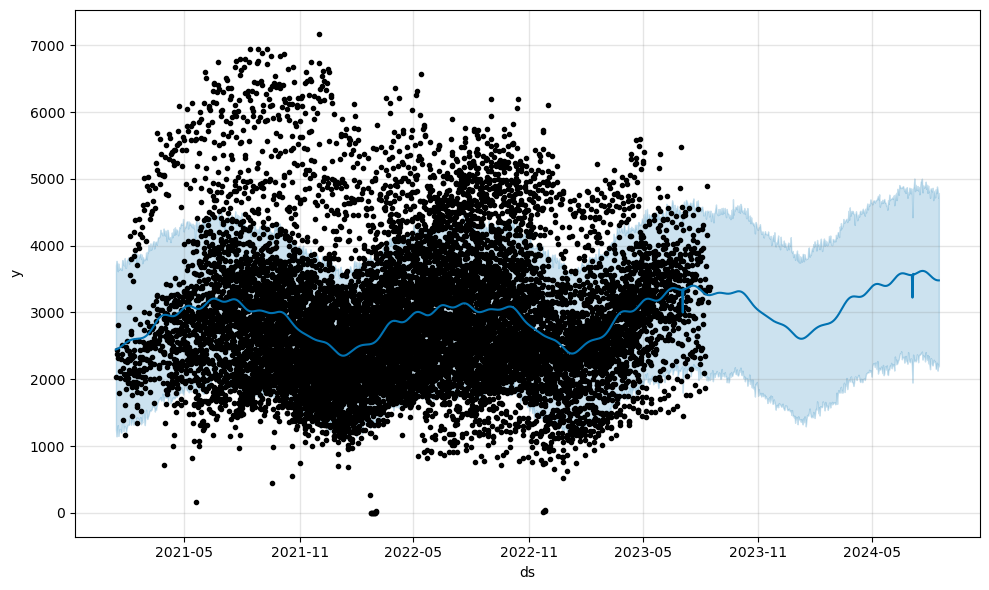

In [37]:
#Prophet model

#rename columns to for prophet model
#UPDATE Y COLUMN NAME TO THE TARGET VARIABLE YOU'D LIKE TO PREDICT ON
data1 = data.rename(columns={'calendar_day_date': 'ds', 'daily_yoy_ndt.total_inside_sales': 'y'}) 

#dataFrame of holidays 
holidays = pd.DataFrame({
    'holiday': ['Independence Day', 'Thanksgiving Day', 'Independence Day','Thanksgiving Day'],
    'ds': pd.to_datetime([
        '2023-07-04','2023-11-23', '2024-07-04', '2024-11-29'
    ]),
    'observance': ['Actual', 'Actual', 'Actual', 'Actual'],
    'lower_window': 0,
    'upper_window': 1,
})

#set seed
np.random.seed(123)

#initialize the model with parameters
model1 = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=0.5,  #adjust sensitivity 
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=True,
    holidays=holidays,
)

#model1.add_seasonality(name='monthly', period=30.5, fourier_order=5)

#fit the model
model1.fit(data1)

#runtime start
import time
start_time = time.time()

#predict xxxx amount into the future
future_dates = model1.make_future_dataframe(periods=365, include_history=True) #change periods as necessary (365 = 1 year)

#predict on future dates
forecast = model1.predict(future_dates)

#runtime end
end_time = time.time()

#print forecase dates and graph
print(forecast)
model1.plot(forecast)

#runtime results
run_time = round(end_time - start_time,2)
print(f"Run time: {run_time} seconds")

### Cross validation

Prophet has specific cross validation hyperparameters. 

* inital = how many days the model should be trained on 
* period = how often cross validation should be performed
* horizon = how often a prediction should be made 

While I do have 2.5 years worth of sales data, I had to reduce the inital hyperparameter in order to work with the period and horizon values. The run time for cross validation is 4.3 minutes. 

In [38]:
#start timer
start_time = time.time() 

#cross-validation for model2
df_cv = cross_validation(model1, 
                         initial='300 days', 
                         period='15 days', 
                         horizon='1 days')
#stop timer
end_time = time.time()

#run time results
run_time = round(end_time - start_time,2)
print(f"Run time: {run_time} seconds")

#metrics
mae = round(mean_absolute_error(df_cv['y'], df_cv['yhat']), 2)
rmse = round(sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])), 2)
mape = round(np.mean(np.abs(df_cv['y'] - df_cv['yhat']) / df_cv['y']) * 100, 2)
rmspe = round((np.sqrt(np.mean(np.square((df_cv['y'] - df_cv['yhat']) / df_cv['y']))) * 100), 2)
rae = round(np.sum(np.abs(df_cv['y'] - df_cv['yhat'])) / np.sum(np.abs(df_cv['y'] - np.mean(df_cv['y']))), 2)
rrse = round(sqrt(np.sum(np.square(df_cv['y'] - df_cv['yhat'])) / np.sum(np.square(df_cv['y'] - np.mean(df_cv['y'])))), 2)
naive_forecast = df_cv['y'].shift(1).fillna(method='bfill')
mae_naive = np.mean(np.abs(df_cv['y'] - naive_forecast))
mae_forecast = np.mean(np.abs(df_cv['y'] - df_cv['yhat']))
mase = mae_forecast / mae_naive if mae_naive != 0 else float('inf') 
mase = round(mase, 2)

#print the metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"RMSPE: {rmspe}")
print(f"RAE: {rae}")
print(f"RRSE: {rrse}")
print(f"MASE: {mase}")

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/44 [00:00<?, ?it/s]

11:43:03 - cmdstanpy - INFO - Chain [1] start processing
11:43:03 - cmdstanpy - INFO - Chain [1] done processing
11:43:05 - cmdstanpy - INFO - Chain [1] start processing
11:43:05 - cmdstanpy - INFO - Chain [1] done processing
11:43:07 - cmdstanpy - INFO - Chain [1] start processing
11:43:07 - cmdstanpy - INFO - Chain [1] done processing
11:43:09 - cmdstanpy - INFO - Chain [1] start processing
11:43:09 - cmdstanpy - INFO - Chain [1] done processing
11:43:11 - cmdstanpy - INFO - Chain [1] start processing
11:43:12 - cmdstanpy - INFO - Chain [1] done processing
11:43:14 - cmdstanpy - INFO - Chain [1] start processing
11:43:15 - cmdstanpy - INFO - Chain [1] done processing
11:43:17 - cmdstanpy - INFO - Chain [1] start processing
11:43:18 - cmdstanpy - INFO - Chain [1] done processing
11:43:20 - cmdstanpy - INFO - Chain [1] start processing
11:43:20 - cmdstanpy - INFO - Chain [1] done processing
11:43:23 - cmdstanpy - INFO - Chain [1] start processing
11:43:23 - cmdstanpy - INFO - Chain [1]

Run time: 258.11 seconds
MAE: 707.26
RMSE: 925.03
MAPE: inf
RMSPE: inf
RAE: 0.96
RRSE: 0.97
MASE: 0.75


### Testing the model

This model is able to then take the training data and test on a single store. The best results on a single store(store id 23765) were as follows:

* MAE: 327.69
* RMSE: 414.34
* MAPE: 12.23
* RMSPE: 16.4
* RAE: 0.84
* RRSE: 0.84
* MASE: 0.89

Compared to the entire train model, the MAE and RMSE results are much lower. The MAPE value of 12.23 indicates that the predicted values are within 12.23% of the actual values. The MASE value increased but it is still 11% better than a general naive model. It takes 1.49 seconds to predict for single store. 

            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2022-05-17  2031.930818  1676.192451  4281.104369  2031.930818   
1   2022-05-18  2031.103498  1769.328197  4202.350842  2031.103498   
2   2022-05-19  2030.276178  1685.874787  4200.981211  2030.276178   
3   2022-05-20  2029.448858  1780.819390  4244.926067  2029.448858   
4   2022-05-21  2028.621539  1759.082664  4203.815817  2028.621539   
5   2022-05-22  2027.794219  1750.554366  4133.663588  2027.794219   
6   2022-05-23  2026.966899  1704.052497  4156.379644  2026.966899   
7   2022-05-24  2026.139580  1753.257235  4227.376510  2026.139580   
8   2022-05-25  2025.312260  1722.697084  4087.751105  2025.312260   
9   2022-05-26  2024.484940  1658.006129  4093.147327  2024.484940   
10  2022-05-27  2023.657621  1649.910697  4167.864192  2023.657621   
11  2022-05-28  2022.830301  1756.390666  4279.573159  2022.830301   
12  2022-05-29  2022.002981  1831.012587  4285.609183  2022.002981   
13  2022-05-30  2021

Run time: 1.49 seconds


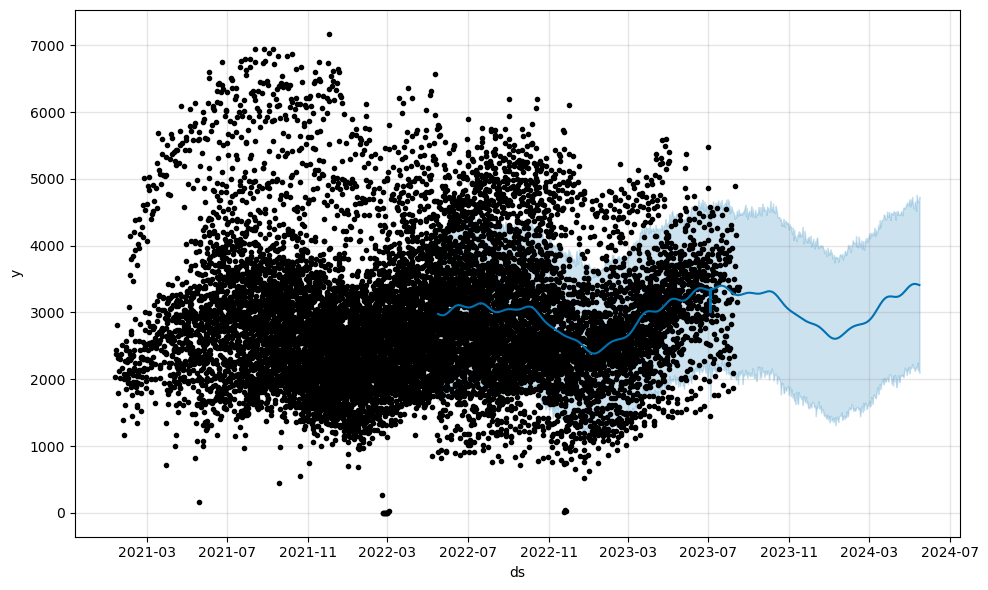

In [39]:
#run prediction on an individual store

#store_id = 22085 #MAPE 41.51 
#store_id = 22750 #MAPE 35.53
#store_id = 21980 #MAPE 31.78
#store_id = 23415 #MAPE 55.38 
#store_id = 23345 #MAPE 22.16
#store_id = 23660 #MAPE 145.35 
#store_id = 23730 #MAPE 17.23
#store_id = 21560 #MAPE 17.59
#store_id = 24150 #MAPE 17.82
#store_id = 23380 #MAPE 15.32
#store_id = 22015 #MAPE 17.17
#store_id = 24535 #MAPE 17.38
#store_id = 22540 #MAPE 20.86
#store_id = 22715 #MAPE 25.99
#store_id = 22260 #MAPE 25.99
store_id = 23765 #MAPE 12.18 <-- the best metrics
#store_id = 23240 #MAPE 21.0
#store_id = 22925 #MAPE 10.82
#store_id = 22785 #MAPE 13.41
#store_id = 24220 #MAPE 14.27
#store_id = 22330 #MAPE 23.77
#store_id = 22820 #MAPE 14.98
#store_id = 23065 #MAPE       
#store_id = 23450 #MAPE 22.83
#store_id = 22855 #MAPE 22.83
#store_id = 23835 #MAPE 21.0
#store_id = 22400 #MAPE contains zeros
#store_id = 22680 #MAPE 26.23
#store_id = 22890 #MAPE 58.06 
#store_id = 24255 #MAPE 44.36 
#store_id = 23555 #MAPE 43.11 
#store_id = 23905 #MAPE 41.97 
#store_id = 22120 #MAPE 37.74
#store_id = 23135 #MAPE 39.19
#store_id = 22645 #MAPE 36.79
#store_id = 22505 #MAPE 40.68 
#store_id = 22575 #MAPE 50.53 
#store_id = 23485 #MAPE 53.58 

#filter the data for the specific store id
filtered_data = data1[data1['site_id_msba'].isin([store_id])]

#df with dates + 365 days into the future 
last_date = filtered_data['ds'].max()
future_dates = pd.date_range(start=last_date, periods=366)[1:]  
future_df = pd.DataFrame({'ds': future_dates})

#runtime start
start_time = time.time()

#join the future dates with filtered data dates
dates_for_prediction = pd.concat([filtered_data[['ds']], future_df], ignore_index=True)

#predict on joined dates
new_forecast = model1.predict(dates_for_prediction)
print(new_forecast)
model1.plot(new_forecast)

#runtime end
end_time = time.time()

#runtime results
run_time = round(end_time - start_time,2)
print(f"Run time: {run_time} seconds")

In [40]:
# Convert the 'ds' column to datetime in both dataframes
new_forecast['ds'] = pd.to_datetime(new_forecast['ds'])
filtered_data['ds'] = pd.to_datetime(filtered_data['ds'])

# Merge forecasted values with the actual values from filtered_data
merged_data = pd.merge(new_forecast, filtered_data, on='ds', how='inner')

# Calculate metrics on the merged data
mae = round(mean_absolute_error(merged_data['y'], merged_data['yhat']), 2)
rmse = round(sqrt(mean_squared_error(merged_data['y'], merged_data['yhat'])), 2)
mape = round(np.mean(np.abs(merged_data['y'] - merged_data['yhat']) / merged_data['y']) * 100, 2)
rmspe = round((np.sqrt(np.mean(np.square((merged_data['y'] - merged_data['yhat']) / merged_data['y']))) * 100), 2)
rae = round(np.sum(np.abs(merged_data['y'] - merged_data['yhat'])) / np.sum(np.abs(merged_data['y'] - np.mean(merged_data['y']))), 2)
rrse = round(sqrt(np.sum(np.square(merged_data['y'] - merged_data['yhat'])) / np.sum(np.square(merged_data['y'] - np.mean(merged_data['y'])))), 2)
naive_forecast = merged_data['y'].shift(1).fillna(method='bfill')
mae_naive = np.mean(np.abs(merged_data['y'] - naive_forecast))
mae_forecast = np.mean(np.abs(merged_data['y'] - merged_data['yhat']))
mase = mae_forecast / mae_naive if mae_naive != 0 else float('inf') 
mase = round(mase, 2)

# Print the metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"RMSPE: {rmspe}")
print(f"RAE: {rae}")
print(f"RRSE: {rrse}")
print(f"MASE: {mase}")

MAE: 327.69
RMSE: 414.34
MAPE: 12.23
RMSPE: 16.4
RAE: 0.84
RRSE: 0.84
MASE: 0.89


C:\Users\rache\AppData\Local\Temp\ipykernel_13448\2488973306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ds'] = pd.to_datetime(filtered_data['ds'])


# Results

Maverik is currently using a Naive Model to forecast for the four target sales variables. Maverik has not shared the performance metrics of that model, so I benchmarked my Prophet Model against a general Naive Model results using the MASE metric. The Prophet model does a great job forecasting for stores that have average sales values (MASE of .75 on the training set and .89 for the best testing results). 

This model doesn't predict accurately when a store has extremely high or low values because it is taking an aggregrate of all the stores' data. The Prophet Model is able to capture many different seasonality changes that other timeseries models are not because they are trained on a single year's worth of data for a single store. This model is trained on 2.5 years of data from all available stores. To combat the inability to predict accurately on outlier stores, I'd like to explore further modeling options including combining this model with another time series model that was made by my teammates (ARIMA, SARIMA, XGBOOST, NEURAL NETS, etc.). I believe doing so will produce more accurate forecasting results than any of our models on their own.